In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

## Loading the Dataset

In [2]:
apr_data = pd.read_csv(r'Uber-dataset/uber-raw-data-apr14.csv/uber-raw-data-apr14.csv')
may_data = pd.read_csv(r'Uber-dataset/uber-raw-data-may14.csv/uber-raw-data-may14.csv')
jun_data = pd.read_csv(r'Uber-dataset/uber-raw-data-jun14.csv/uber-raw-data-jun14.csv')
jul_data = pd.read_csv(r'Uber-dataset/uber-raw-data-jul14.csv/uber-raw-data-jul14.csv')
aug_data = pd.read_csv(r'Uber-dataset/uber-raw-data-aug14.csv/uber-raw-data-aug14.csv')
sep_data = pd.read_csv(r'Uber-dataset/uber-raw-data-sep14.csv/uber-raw-data-sep14.csv')

In [3]:
apr_data.sample(2)

,Date/Time,Lat,Lon,Base
19730,4/17/2014 15:52:00,40.7499,-73.9924,B02512
238329,4/5/2014 21:46:00,40.7414,-74.0050,B02617


In [4]:
jul_data.sample(2)

,Date/Time,Lat,Lon,Base
489174,7/23/2014 17:44:00,40.7358,-74.0007,B02617
167401,7/18/2014 12:19:00,40.7773,-73.9592,B02598


In [5]:
# The above data is for 6 month of year 2014
data_2014 = pd.concat([apr_data, may_data, jun_data, jul_data, aug_data, sep_data], axis=0)

In [6]:
data_2014.shape

(4534327, 4)

In [7]:
data_2014.sample(3)

,Date/Time,Lat,Lon,Base
225785,4/3/2014 0:22:00,40.7331,-73.9892,B02617
95837,6/8/2014 17:27:00,40.7740,-73.8722,B02598
286703,6/3/2014 18:00:00,40.7446,-74.0045,B02617


## Data Featuring 

Here I directly jumped in Data featuring because the dataset is well managed , it doesn't have NaN values and it's perfect for analysis

In [8]:
from datetime import datetime

# Convert Date.Time to datetime format
data_2014['Date/Time'] = pd.to_datetime(data_2014['Date/Time'], format='%m/%d/%Y %H:%M:%S')

data_2014['day'] = data_2014['Date/Time'].dt.day.astype('category')
data_2014['month'] = data_2014['Date/Time'].dt.month_name().astype('category')
data_2014['year'] = data_2014['Date/Time'].dt.year.astype('category')
data_2014['dayofweek'] = data_2014['Date/Time'].dt.day_name().astype('category')


In [9]:
data_2014['Time'] = pd.to_datetime(data_2014['Date/Time'], format='%H:%M:%S').dt.time

In [10]:
data_2014.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'day', 'month', 'year', 'dayofweek',
       'Time'],
      dtype='object')

In [11]:
data_2014['hour'] = data_2014['Time'].apply(lambda x: x.hour).astype('category')
data_2014['minute'] = data_2014['Time'].apply(lambda x: x.minute).astype('category')
data_2014['second'] = data_2014['Time'].apply(lambda x: x.second).astype('category')

In [12]:
hour_data = data_2014.groupby('hour').size().reset_index(name='Total')
hour_data

,hour,Total
0,0,103836
1,1,67227
2,2,45865
3,3,48287
4,4,55230
5,5,83939
6,6,143213
7,7,193094
8,8,190504
9,9,159967


## Data Visualization 

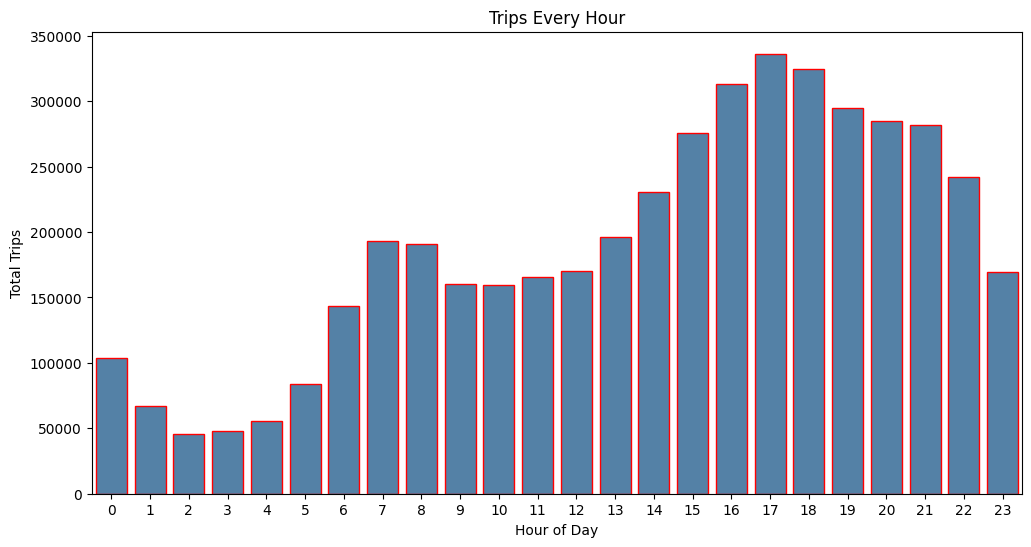

In [13]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='Total', data=hour_data, 
            color='steelblue', edgecolor='red')

plt.title('Trips Every Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation
plt.show()

In [14]:
month_hour = data_2014.groupby(['month', 'hour']).size().reset_index(name='Total')
month_hour.head(5)

,month,hour,Total
0,April,0,11910
1,April,1,7769
2,April,2,4935
3,April,3,5040
4,April,4,6095


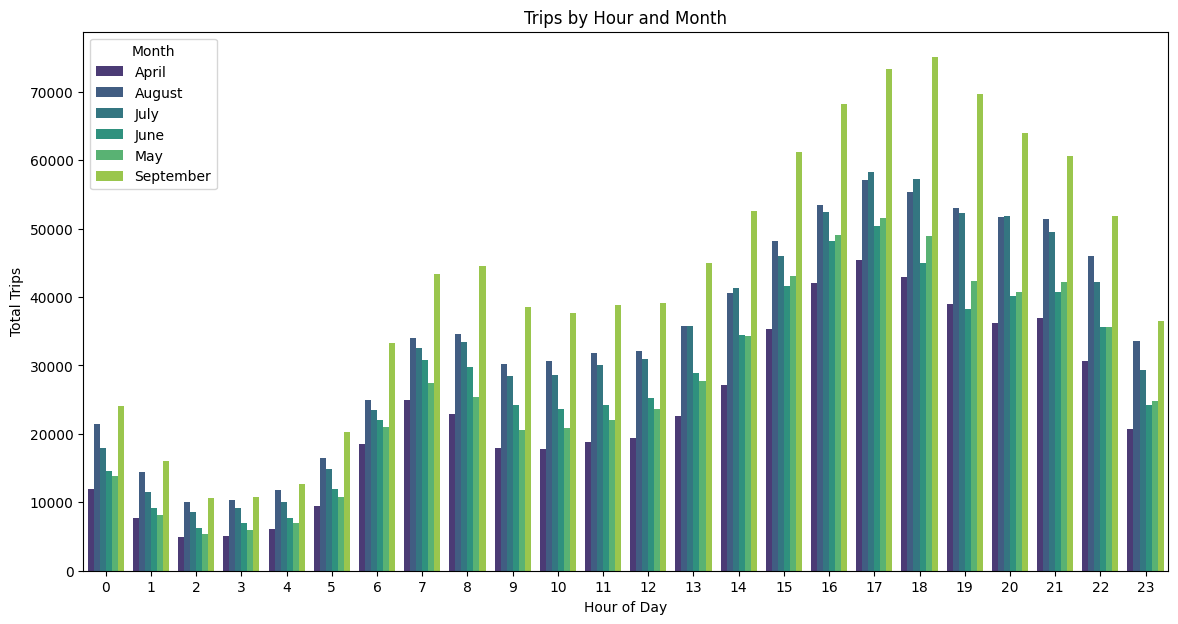

In [15]:
# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='hour', y='Total', hue='month', 
            data=month_hour, palette='viridis')

plt.title('Trips by Hour and Month')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Month')
plt.show()

In [16]:
day_group = data_2014.groupby('day').size().reset_index(name='Total')
day_group.head(5)

,day,Total
0,1,127430
1,2,143201
2,3,142983
3,4,140923
4,5,147054


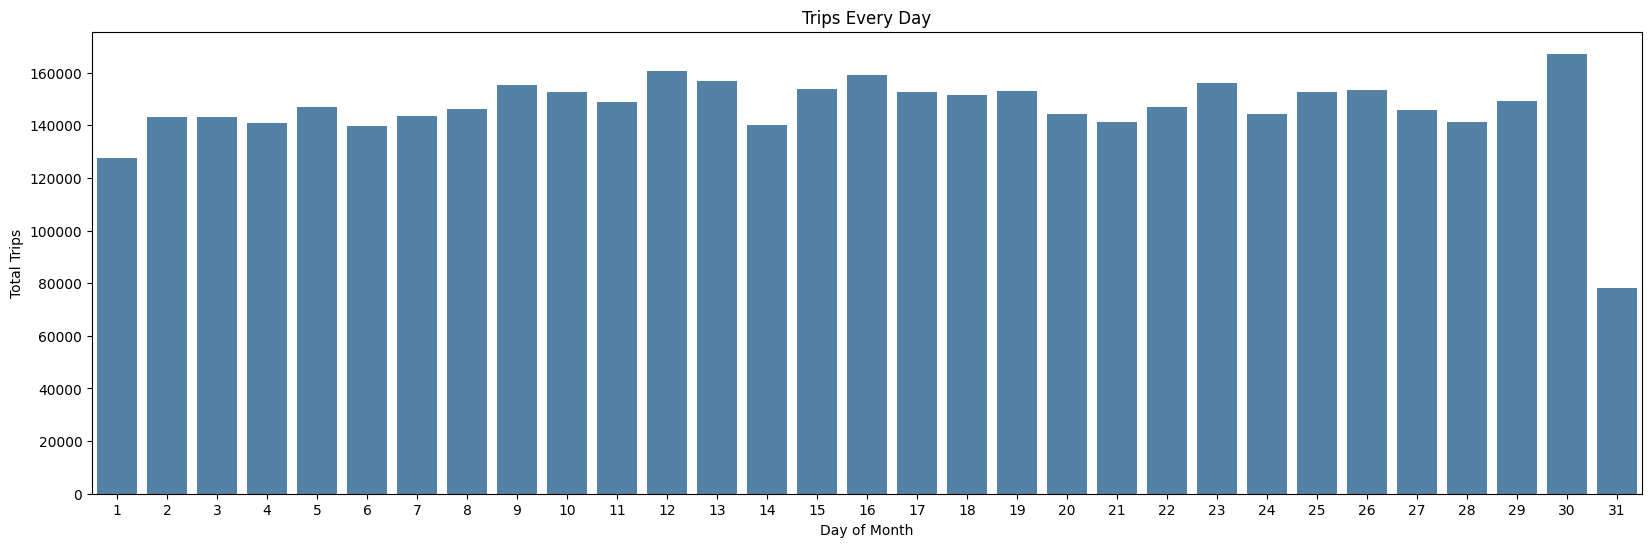

In [17]:
# Plot
plt.figure(figsize=(20, 6))
sns.barplot(
    x='day', 
    y='Total', 
    data=day_group, 
    color='steelblue', 
)

plt.title('Trips Every Day')
plt.xlabel('Day of Month')
plt.ylabel('Total Trips')
plt.show()

In [18]:
day_month_group = data_2014.groupby(['month', 'day']).size().reset_index(name='Total')

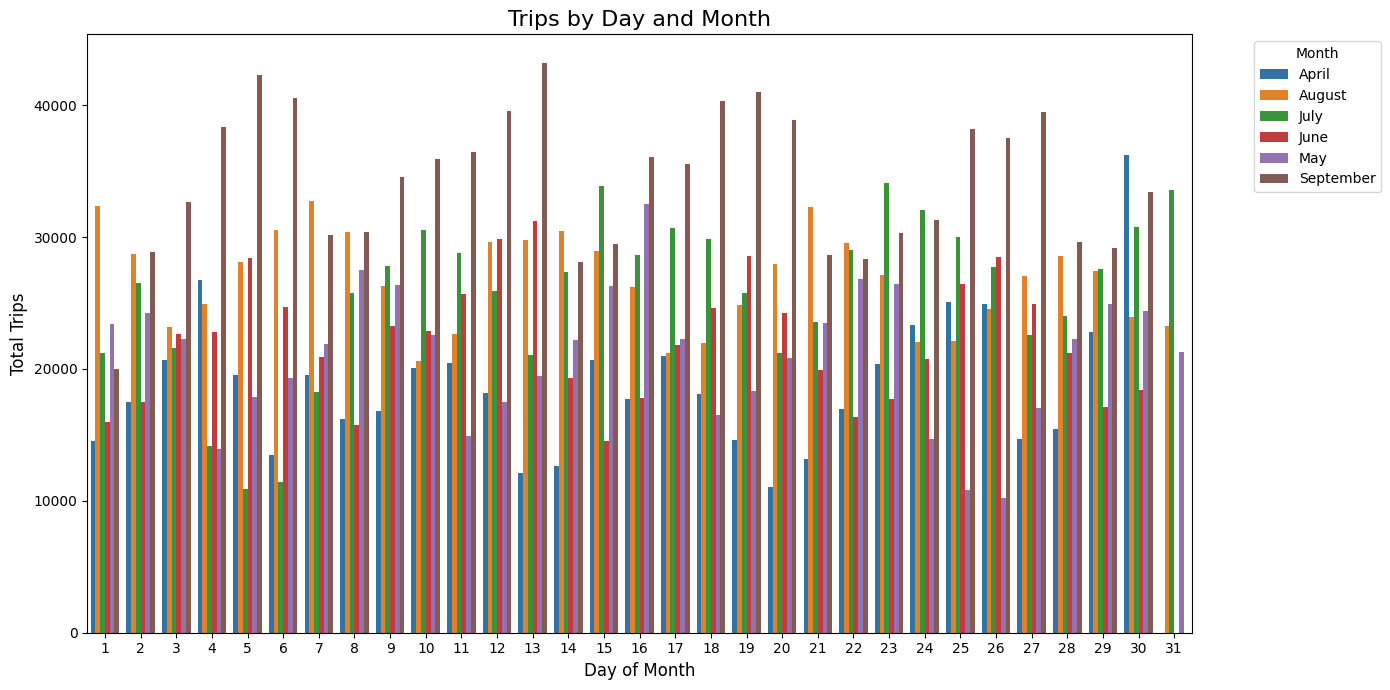

In [19]:
# Defined custum colors
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B']

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(
    x='day', 
    y='Total', 
    hue='month', 
    data=day_month_group,
    palette=colors
)

plt.title('Trips by Day and Month', fontsize=16)
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)

plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [20]:
month_group = data_2014.groupby('month').size().reset_index(name='Total')
month_group.head(3)

,month,Total
0,April,564516
1,August,829275
2,July,796121


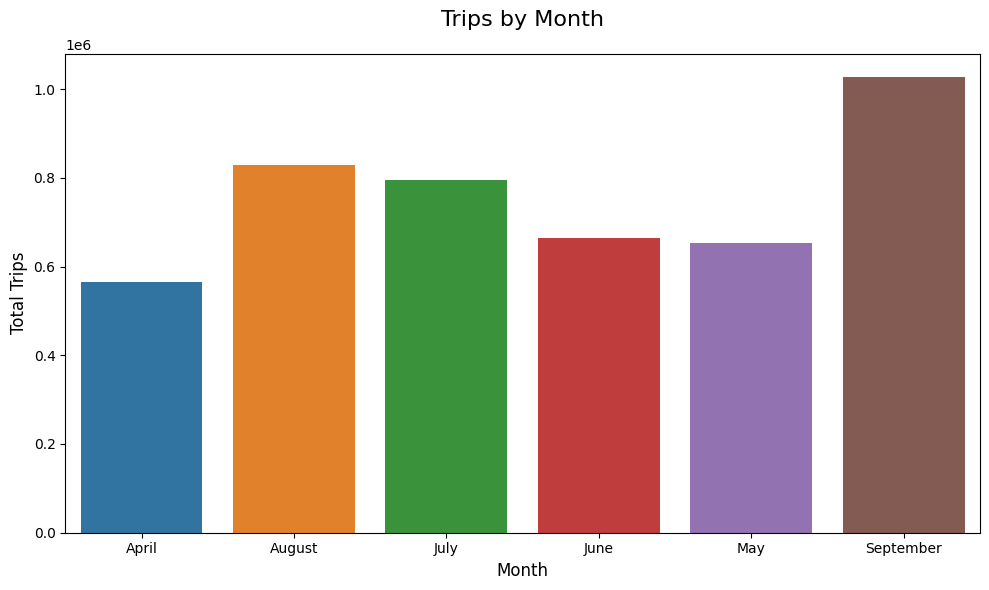

In [21]:
# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='month', 
    y='Total', 
    data=month_group,
    palette=colors,
    saturation=0.75  
)


plt.title('Trips by Month', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.tight_layout()
plt.show()

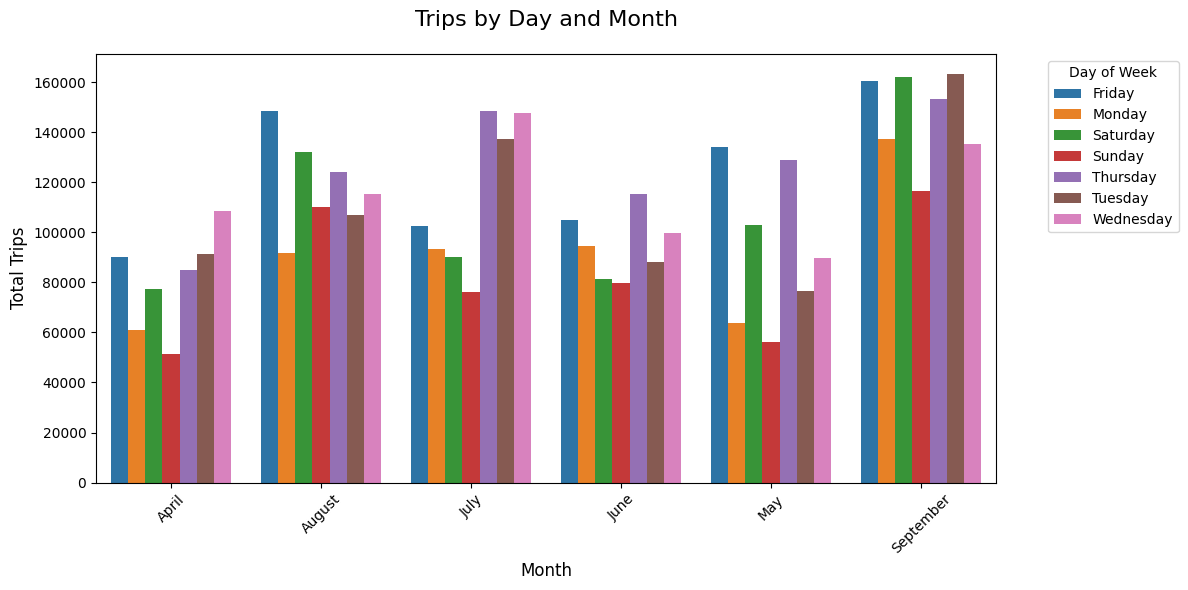

In [22]:
month_weekday = data_2014.groupby(['month', 'dayofweek']).size().reset_index(name='Total')


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2']  # 7 colors for 7 weekdays

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='month',
    y='Total',
    hue='dayofweek',
    data=month_weekday,
    palette=colors,
    saturation=0.8,
    dodge=True  
)

plt.title('Trips by Day and Month', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

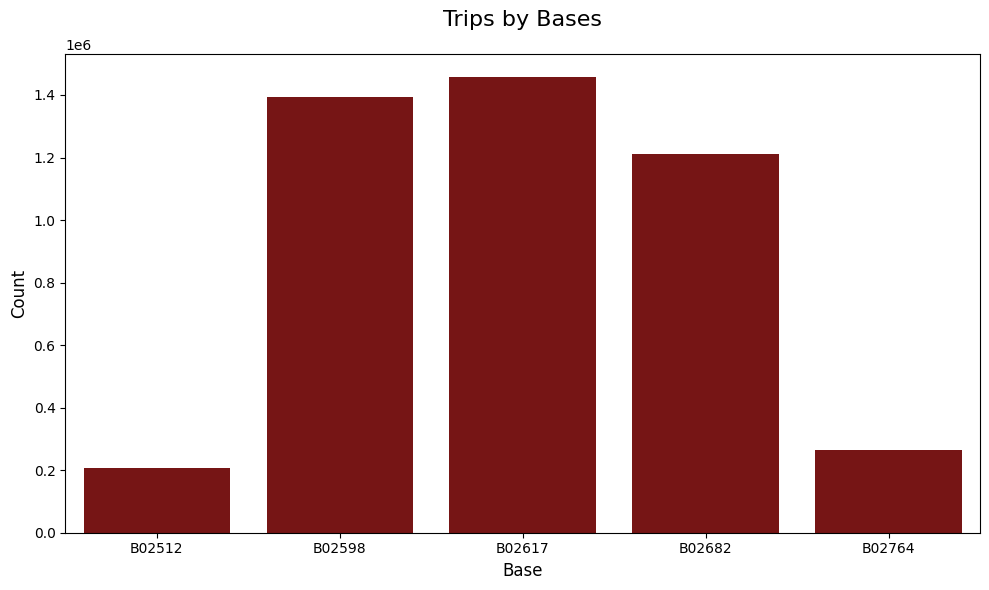

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='Base', 
    data=data_2014,
    color='darkred',  
    saturation=0.7    
)

plt.title('Trips by Bases', fontsize=16, pad=20)
plt.xlabel('Base', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks(rotation=45 if len(data_2014['Base'].unique()) > 5 else 0)
plt.tight_layout()
plt.show()

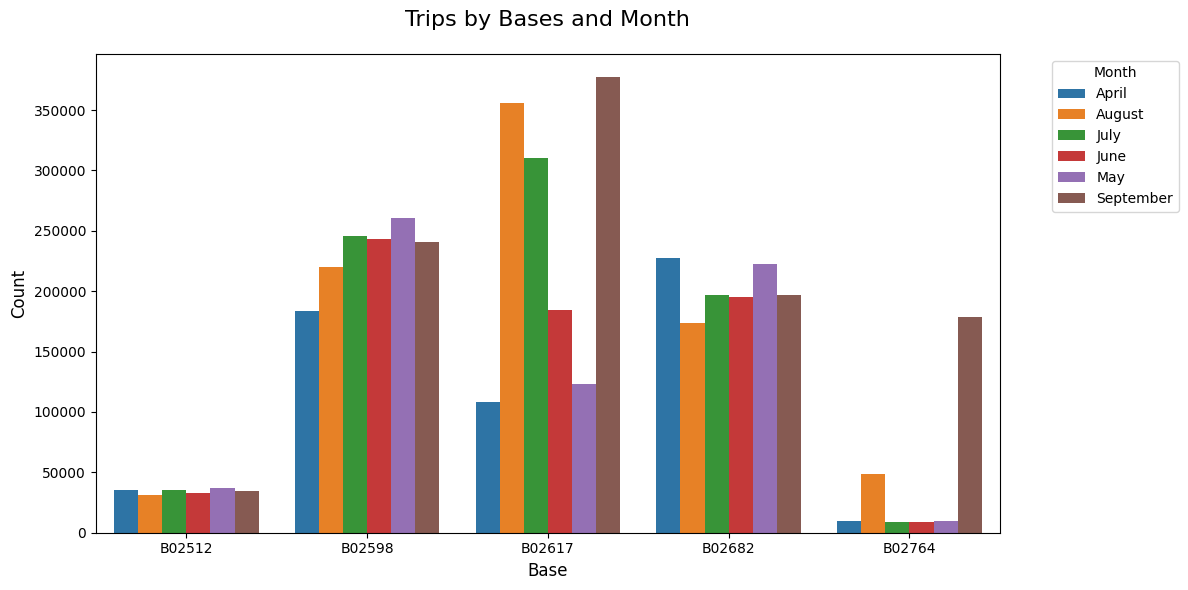

In [24]:
# Define your custom colors (example with 6 colors for months)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x='Base',
    hue='month',
    data=data_2014,
    palette=colors,
    dodge=True, 
    saturation=0.8
)


plt.title('Trips by Bases and Month', fontsize=16, pad=20)
plt.xlabel('Base', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45 if len(data_2014['Base'].unique()) > 5 else 0)

plt.tight_layout()
plt.show()

In [25]:
data_2014.sample(3)

,Date/Time,Lat,Lon,Base,day,month,year,dayofweek,Time,hour,minute,second
857916,2014-09-03 14:47:00,40.7243,-74.0015,B02764,3,September,2014,Wednesday,14:47:00,14,47,0
263069,2014-06-28 23:58:00,40.7616,-73.9815,B02598,28,June,2014,Saturday,23:58:00,23,58,0
35790,2014-09-01 12:15:00,40.6629,-73.9572,B02598,1,September,2014,Monday,12:15:00,12,15,0


In [26]:
data_2014.dayofweek.value_counts(normalize=True)

dayofweek
Thursday     0.166540
Friday       0.163451
Wednesday    0.153603
Tuesday      0.146392
Saturday     0.142494
Monday       0.119416
Sunday       0.108104
Name: proportion, dtype: float64

In [27]:
print("Unique values before conversion:", data_2014['dayofweek'].unique())

Unique values before conversion: ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday']
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']


In [28]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

existing_days = set(data_2014['dayofweek'].dropna().unique())
missing_days = existing_days - set(day_order)
if missing_days:
    print(f"Warning: These days exist in data but not in day_order: {missing_days}")
    day_order += list(missing_days)

data_2014['dayofweek'] = pd.Categorical(
    data_2014['dayofweek'], 
    categories=day_order,
    ordered=True
)

print("Number of nulls after conversion:", data_2014['dayofweek'].isnull().sum())

Number of nulls after conversion: 0


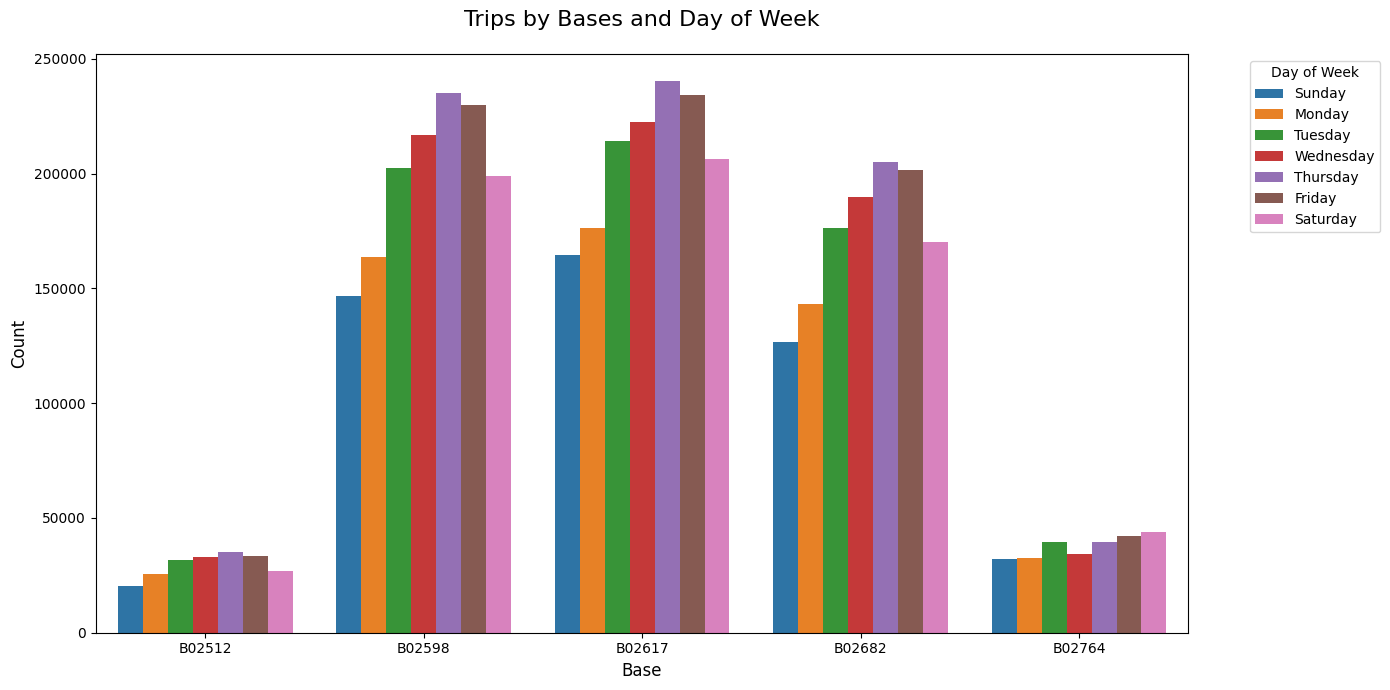

In [29]:
# Define colors (7 colors for each day of week)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(14, 7))
sns.countplot(
    x='Base',
    hue='dayofweek',
    data=data_2014,
    palette=colors,
    dodge=True,  
    saturation=0.8
)


plt.title('Trips by Bases and Day of Week', fontsize=16, pad=20)
plt.xlabel('Base', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.xticks(rotation=45 if len(data_2014['Base'].unique()) > 5 else 0)

plt.tight_layout()
plt.show()

In [30]:
day_and_hour = data_2014.groupby(['day', 'hour']).size().reset_index(name='Total')
day_and_hour.head(4)

,day,hour,Total
0,1,0,3247
1,1,1,1982
2,1,2,1284
3,1,3,1331


## Heat Maps

**Here in the below sections i have created multiple heatmaps to show any sort of realtionship between variables if exist**

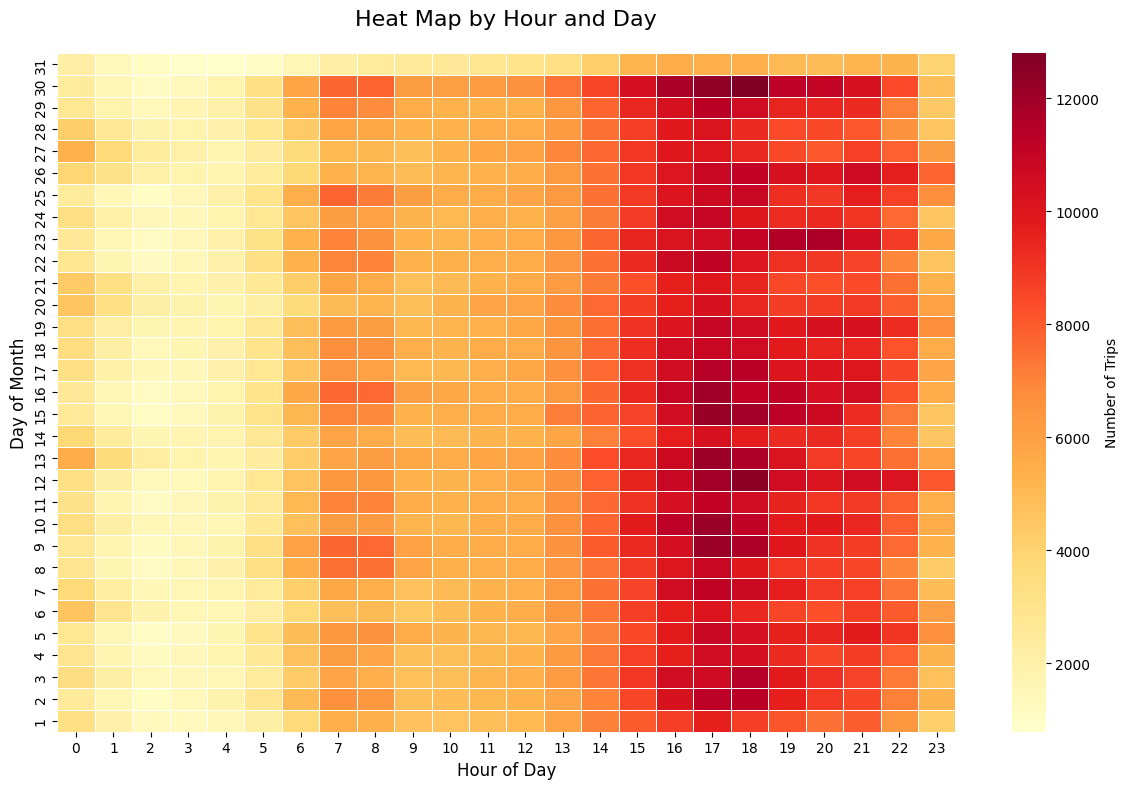

In [31]:
heatmap_data = day_and_hour.pivot(index="day", columns="hour", values="Total")

plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",  
    linewidths=0.5,   
    linecolor="white",
    annot=False,      
    fmt="g",         
    cbar_kws={'label': 'Number of Trips'}
)

plt.title("Heat Map by Hour and Day", pad=20, fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Day of Month", fontsize=12)

plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

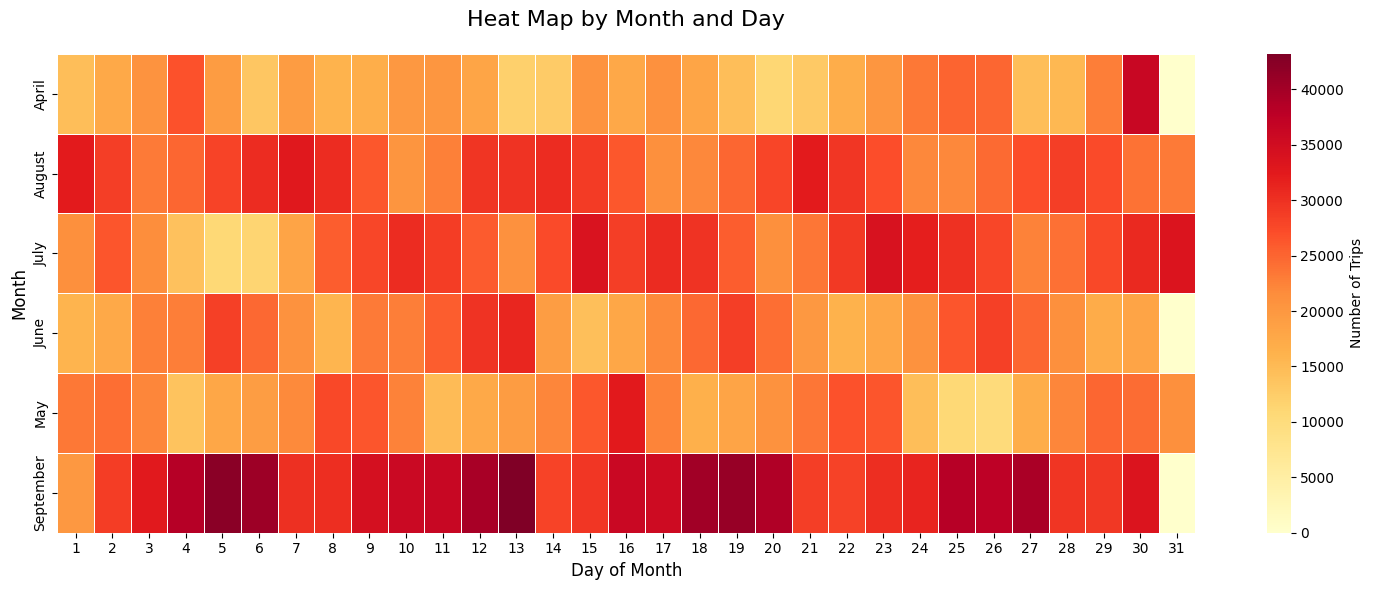

In [32]:
heatmap_data = day_month_group.pivot(index="month", columns="day", values="Total")

plt.figure(figsize=(15, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",          
    linewidths=0.5,         
    linecolor="white",
    annot=False,             
    fmt="g",               
    cbar_kws={'label': 'Number of Trips'}
)

plt.title("Heat Map by Month and Day", pad=20, fontsize=16)
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Month", fontsize=12)


month_order = ['April', 'May', 'June', 'July', 'August', 'September']
heatmap_data = heatmap_data.reindex(month_order)

plt.tight_layout()
plt.show()

In [33]:
data_2014.month.unique()

['April', 'May', 'June', 'July', 'August', 'September']
Categories (6, object): ['April', 'August', 'July', 'June', 'May', 'September']

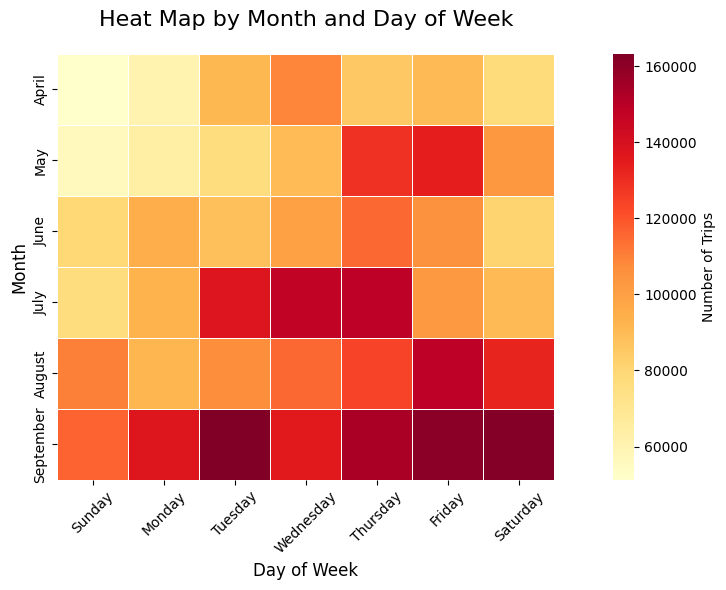

In [34]:
heatmap_data = month_weekday.pivot(index="month", 
                                 columns="dayofweek", 
                                 values="Total")


weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
month_order = ['April', 'May', 'June', 'July', 'August', 'September']

heatmap_data = heatmap_data[weekday_order].reindex(month_order)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",          
    linewidths=0.5,         
    linecolor="white",
    annot=False,             
    fmt="g",              
    cbar_kws={'label': 'Number of Trips'},
    square=True          
)

plt.title("Heat Map by Month and Day of Week", pad=20, fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Month", fontsize=12)


plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

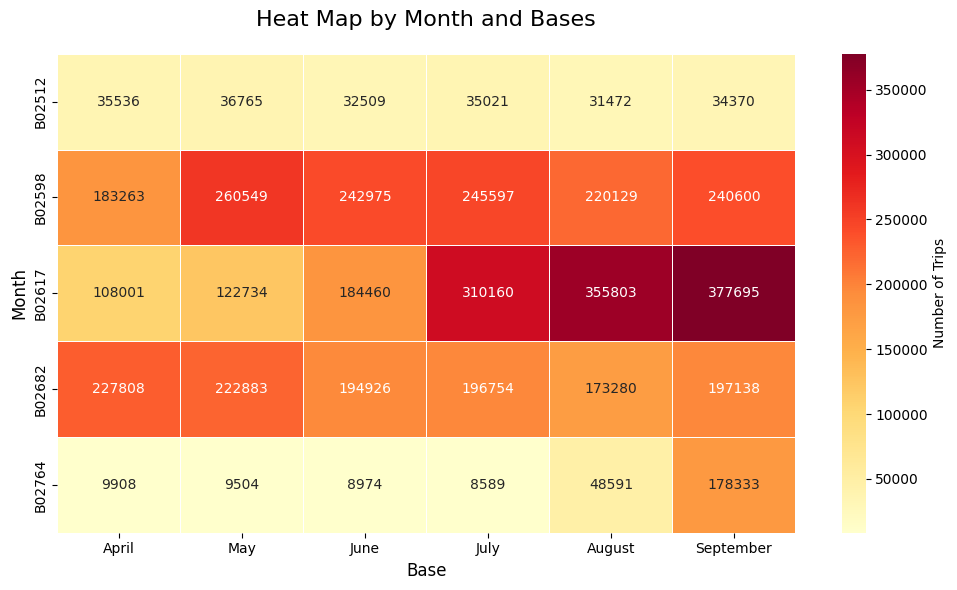

In [35]:
month_base = data_2014.groupby(['Base', 'month']).size().reset_index(name='Total')


heatmap_data = month_base.pivot(index="Base", columns="month", values="Total")
month_order = ['April', 'May', 'June', 'July', 'August', 'September']
heatmap_data = heatmap_data[month_order]

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt="g",
    cbar_kws={'label': 'Number of Trips'}
)
plt.title("Heat Map by Month and Bases", pad=20, fontsize=16)
plt.xlabel("Base", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.tight_layout()
plt.show()

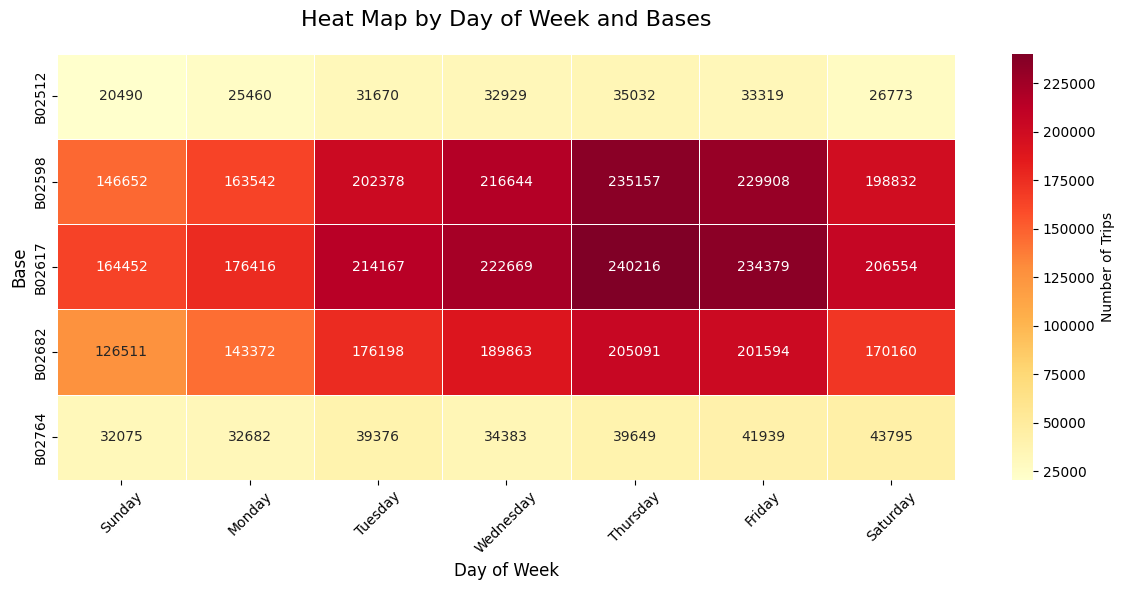

In [36]:
dayofweek_bases = data_2014.groupby(['Base', 'dayofweek']).size().reset_index(name='Total')


heatmap_data = dayofweek_bases.pivot(index="Base", columns="dayofweek", values="Total")
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
heatmap_data = heatmap_data[weekday_order]

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor="white",
    annot=True,
    fmt="g",
    cbar_kws={'label': 'Number of Trips'}
)
plt.title("Heat Map by Day of Week and Bases", pad=20, fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Base", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Creating a map visualization of rides in New York

**here below, the beautiful  visalization of uber rides throughtout the whole new york using map visualization**

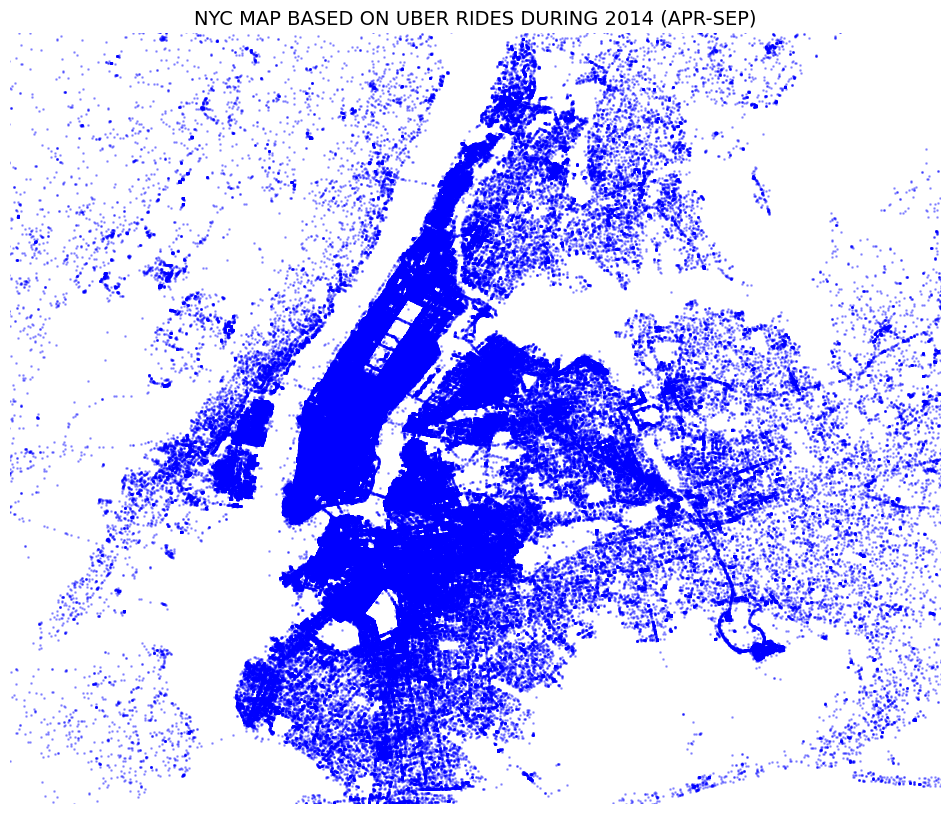

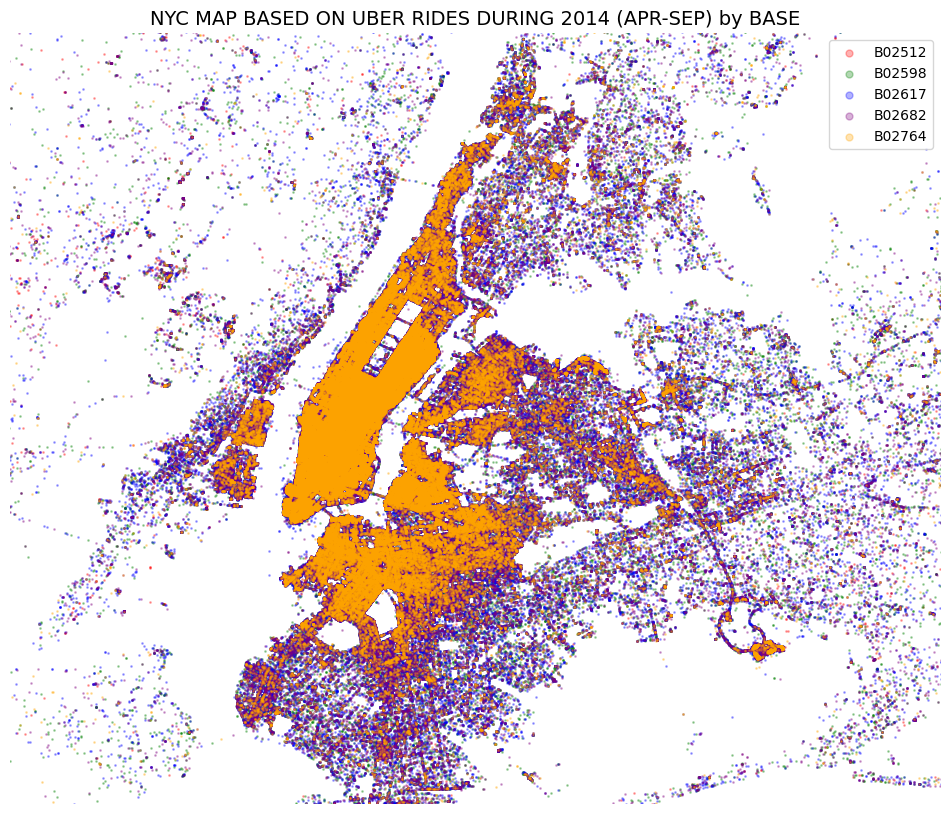

In [37]:
import matplotlib.pyplot as plt
import contextily as ctx

# Define NYC boundaries
min_lat, max_lat = 40.5774, 40.9176
min_long, max_long = -74.15, -73.7004

# 1. Basic NYC Map (All Rides)
plt.figure(figsize=(12, 10))
ax = plt.gca()
data_2014.plot(kind='scatter', x='Lon', y='Lat', ax=ax, 
               s=1, color='blue', alpha=0.3)
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)
ax.set_title('NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)', fontsize=14)
ax.axis('off')
plt.show()

# 2. NYC Map Colored by Base
plt.figure(figsize=(12, 10))
ax = plt.gca()
for base, color in zip(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'],
                       ['red', 'green', 'blue', 'purple', 'orange']):
    subset = data_2014[data_2014['Base'] == base]
    subset.plot(kind='scatter', x='Lon', y='Lat', ax=ax,
               s=1, color=color, label=base, alpha=0.3)
ax.set_xlim(min_long, max_long)
ax.set_ylim(min_lat, max_lat)
ax.set_title('NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE', fontsize=14)
ax.legend(markerscale=5)
ax.axis('off')
plt.show()